In [5]:
# Working perfectly 3 8 12 14

# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import re
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Setup function to detect car plate
def carplate_detect(image, carplate_haar_cascade):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

    cv2.imwrite("result.png", image)

def carplate_extract(image, carplate_haar_cascade):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img_extract = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img_extract

def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image


def convertToText(carplate_img):
    #Detection  
    carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

    carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    detected_carplate_img = carplate_detect(carplate_img_rgb, carplate_haar_cascade)
    enlarge_plt_display(detected_carplate_img, 1.2) 


    #OCR
    carplate_extract_img = carplate_extract(carplate_img_rgb, carplate_haar_cascade)
    carplate_extract_img = enlarge_img(carplate_extract_img, 150)
    carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
    carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3

    text = pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                    config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')


    print("text : ", text)
    text = re.sub('[^A-Za-z0-9]+', '', text)
    return text

# carplate_img = cv2.imread('Cars19.png')
# print(convertToText(carplate_img))

text :  0200163

0200163


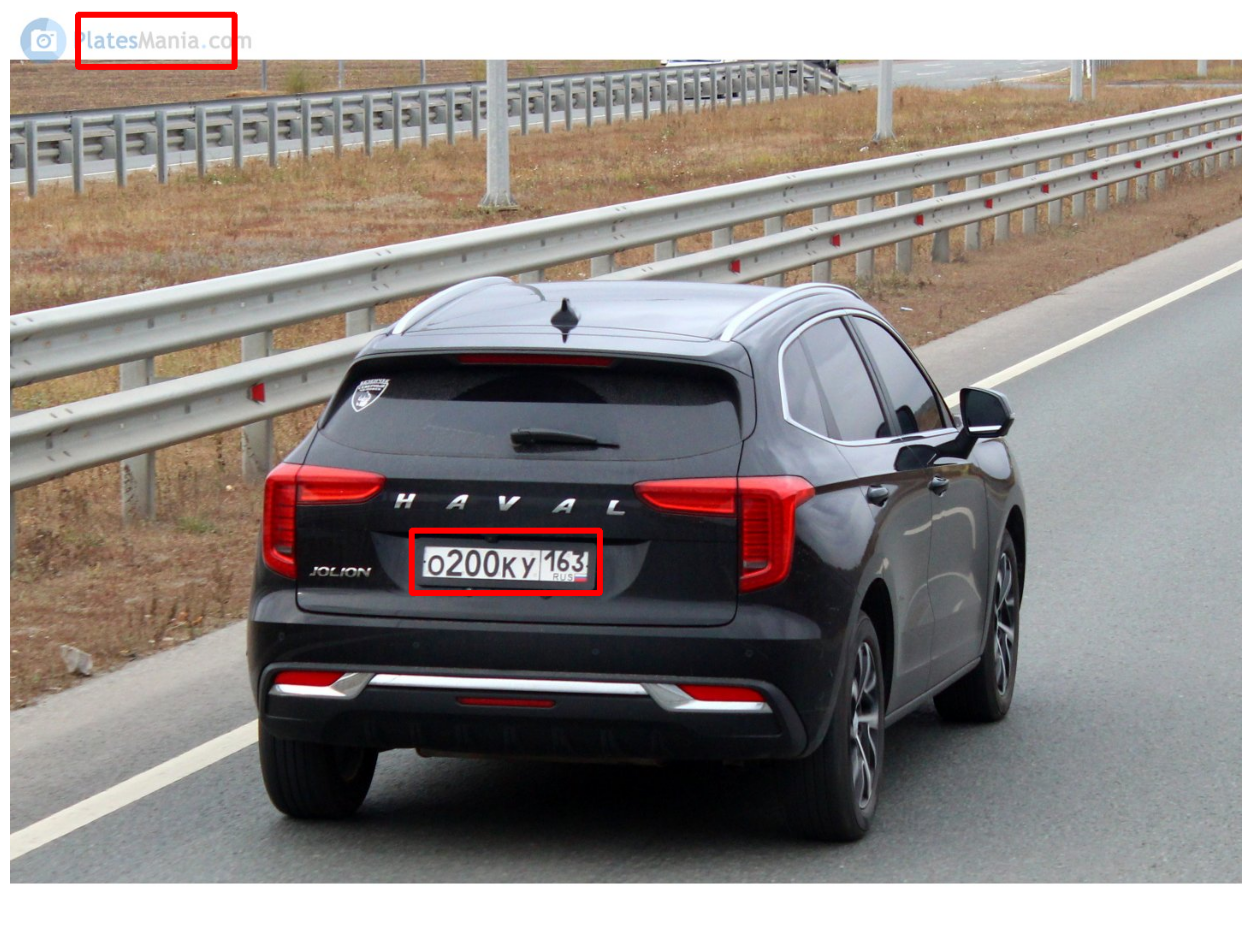

In [7]:
carplate_img = cv2.imread('img/26417135.jpg')
print(convertToText(carplate_img))